In [12]:
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM, Dense
from keras.models import Sequential

In [13]:
# df = pd.read_csv('C:/Users/rarvr/Downloads/indexData.csv/indexData.csv')

df = pd.read_csv("C:/Users/rarvr/Downloads/BK.csv")

In [62]:
df.info()
# df.loc[:, df.isna().any()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12527 entries, 0 to 12526
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12527 non-null  datetime64[ns]
 1   Open       12527 non-null  float64       
 2   High       12527 non-null  float64       
 3   Low        12527 non-null  float64       
 4   Close      12527 non-null  float64       
 5   Adj Close  12527 non-null  float64       
 6   Volume     12527 non-null  int64         
 7   Date_ref   12527 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1)
memory usage: 783.1 KB


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ref'] = pd.to_datetime(df['Date'])
df['Date']

0       1973-05-03
1       1973-05-04
2       1973-05-07
3       1973-05-08
4       1973-05-09
           ...    
12522   2022-12-23
12523   2022-12-27
12524   2022-12-28
12525   2022-12-29
12526   2022-12-30
Name: Date, Length: 12527, dtype: datetime64[ns]

In [18]:
# soting data based on the indexes and the datetime
df_sort = df.sort_values(['Date']).set_index('Date')
df_sort

,Open,High,Low,Close,Adj Close,Volume,Date_ref
Date,,,,,,,
1973-05-03,1.479577,1.490619,1.479577,1.490619,0.546459,76981,1973-05-03
1973-05-04,1.490619,1.490619,1.479577,1.490619,0.546459,56604,1973-05-04
1973-05-07,1.490619,1.490619,1.468536,1.490619,0.546459,61132,1973-05-07
1973-05-08,1.479577,1.479577,1.479577,1.479577,0.542411,22642,1973-05-08
1973-05-09,1.479577,1.501661,1.468536,1.501661,0.550507,378115,1973-05-09
...,...,...,...,...,...,...,...
2022-12-23,44.439999,44.709999,44.200001,44.650002,44.312298,2273400,2022-12-23
2022-12-27,44.810001,44.919998,44.509998,44.820000,44.481010,2109600,2022-12-27
2022-12-28,44.820000,44.930000,44.560001,44.630001,44.292450,2013100,2022-12-28


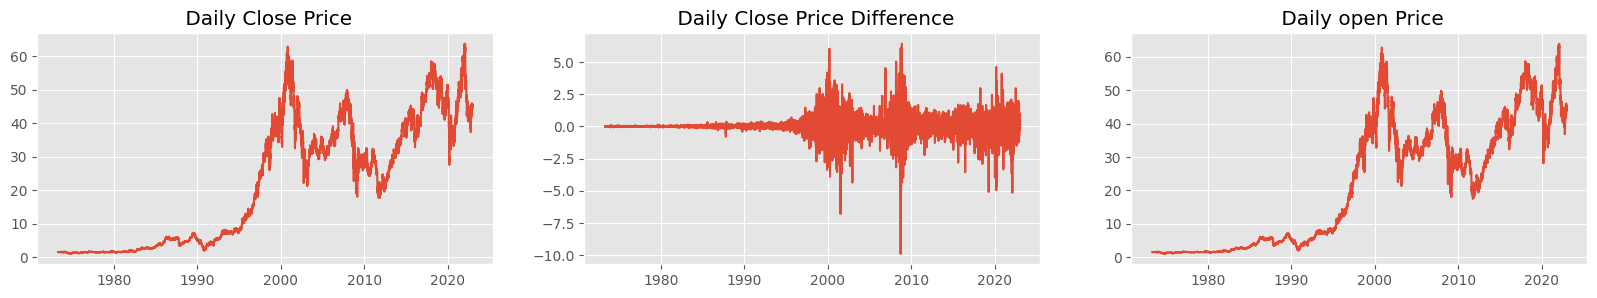

In [61]:
# plotting data
plt.rcParams["figure.figsize"] = (15,5)
plt.style.use('ggplot')


    
fig , axs = plt.subplots(nrows=1 , ncols=3 , figsize=(20,3))

# axs[1].plot(df_sort[df_sort['Index'] == i]['Open'].diff())

axs[0].plot(df_sort['Close'])

axs[1].plot(df_sort['Close'].diff())
axs[2].plot(df_sort['Open'])

axs[2].set_title(' Daily open Price')

axs[0].set_title(' Daily Close Price')
axs[1].set_title(' Daily Close Price Difference')

plt.show()

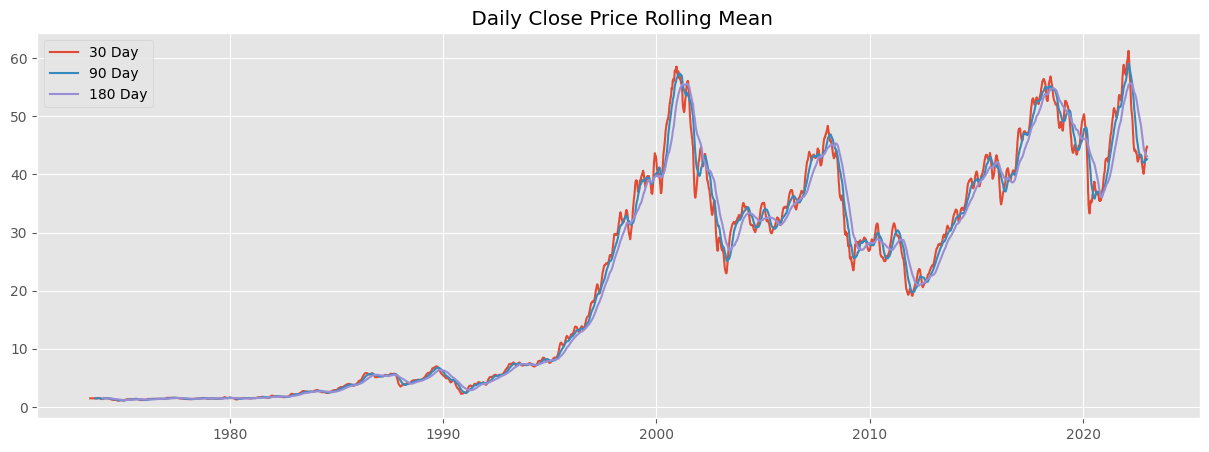

In [20]:
# plotting data
 
plt.rcParams["figure.figsize"] = (15,5)
plt.style.use('ggplot')
i_sort= df_sort
i_sort['Open_Close'] = i_sort['Close'].values - i_sort['Open'].values
    
plt.plot(i_sort['Close'].rolling(30).mean() , label='30 Day')
plt.plot(i_sort['Close'].rolling(90).mean() , label='90 Day')
plt.plot(i_sort['Close'].rolling(180).mean() , label='180 Day')
plt.title(' Daily Close Price Rolling Mean')
plt.legend()
plt.show()


In [21]:
nya=df_sort
nya.size

100216

In [22]:
test_size=len(nya[nya['Date_ref'] > '2019-01-01'])
train_size=len(nya[nya['Date_ref'] < '2019-01-01'])
print(train_size)
print(test_size)

11519
1008


In [23]:
# splitoing datasets
close_train = nya[['Close']][ : train_size]
close_test = nya[['Close']][train_size : ]

In [24]:
nya[['Close']][train_size : ].shape

##split datasets into

(1008, 1)

In [25]:
scaler = StandardScaler()

In [26]:
data_train = scaler.fit_transform(close_train.values)
data_test = scaler.transform(close_test.values)


In [27]:
# close_test.values

In [28]:
n_steps = 30

In [29]:
gen_train = TimeseriesGenerator(data_train, data_train, length=n_steps)
gen_test = TimeseriesGenerator(data_test, data_test, length=n_steps)

In [30]:
model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model_history = model.fit(gen_train , batch_size=1 , epochs=50)

Epoch 1/50
90/90 [==============================] - 11s 71ms/step - loss: 0.0289
Epoch 2/50
90/90 [==============================] - 7s 74ms/step - loss: 0.0094
Epoch 3/50
90/90 [==============================] - 7s 72ms/step - loss: 0.0062
Epoch 4/50
90/90 [==============================] - 6s 70ms/step - loss: 0.0050
Epoch 5/50
90/90 [==============================] - 8s 84ms/step - loss: 0.0048
Epoch 6/50
90/90 [==============================] - 7s 75ms/step - loss: 0.0035
Epoch 7/50
90/90 [==============================] - 7s 79ms/step - loss: 0.0031
Epoch 8/50
90/90 [==============================] - 8s 84ms/step - loss: 0.0026
Epoch 9/50
90/90 [==============================] - 7s 74ms/step - loss: 0.0089
Epoch 10/50
90/90 [==============================] - 7s 74ms/step - loss: 0.0094
Epoch 11/50
90/90 [==============================] - 8s 92ms/step - loss: 0.0042
Epoch 12/50
90/90 [==============================] - 8s 93ms/step - loss: 0.0023
Epoch 13/50
90/90 [=================

Text(0.5, 1.0, 'Loss')

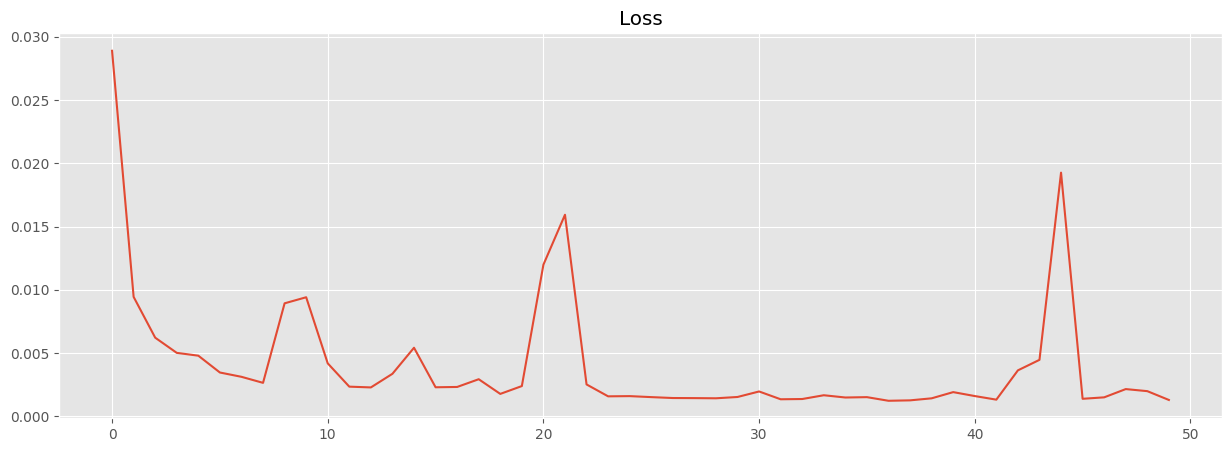

In [32]:
plt.plot(model_history.history['loss'])
plt.title('Loss')

In [33]:
prediction = model.predict(gen_test)

8/8 [==============================] - 1s 28ms/step


In [34]:
gen_test.__dict__

{'data': array([[1.60243462],
        [1.5486125 ],
        [1.62591025],
        ...,
        [1.43810526],
        [1.49708057],
        [1.4890645 ]]),
 'targets': array([[1.60243462],
        [1.5486125 ],
        [1.62591025],
        ...,
        [1.43810526],
        [1.49708057],
        [1.4890645 ]]),
 'length': 30,
 'sampling_rate': 1,
 'stride': 1,
 'start_index': 30,
 'end_index': 1007,
 'shuffle': False,
 'reverse': False,
 'batch_size': 128}

In [35]:
print(gen_test.__dict__)

{'data': array([[1.60243462],
       [1.5486125 ],
       [1.62591025],
       ...,
       [1.43810526],
       [1.49708057],
       [1.4890645 ]]), 'targets': array([[1.60243462],
       [1.5486125 ],
       [1.62591025],
       ...,
       [1.43810526],
       [1.49708057],
       [1.4890645 ]]), 'length': 30, 'sampling_rate': 1, 'stride': 1, 'start_index': 30, 'end_index': 1007, 'shuffle': False, 'reverse': False, 'batch_size': 128}


In [36]:
print(prediction.shape)

(978, 1)


In [37]:
print(scaler.inverse_transform(data_test))
print(data_test)

[[47.5     ]
 [46.560001]
 [47.91    ]
 ...
 [44.630001]
 [45.66    ]
 [45.52    ]]
[[1.60243462]
 [1.5486125 ]
 [1.62591025]
 ...
 [1.43810526]
 [1.49708057]
 [1.4890645 ]]


In [38]:
# index_after_2020 = nya[nya.index > '2019-01-01'].index
# index_after_2019.shape
scaler.inverse_transform(data_test).shape

(1008, 1)

In [39]:
scaler.inverse_transform(prediction).shape
# index_after_2019

(978, 1)

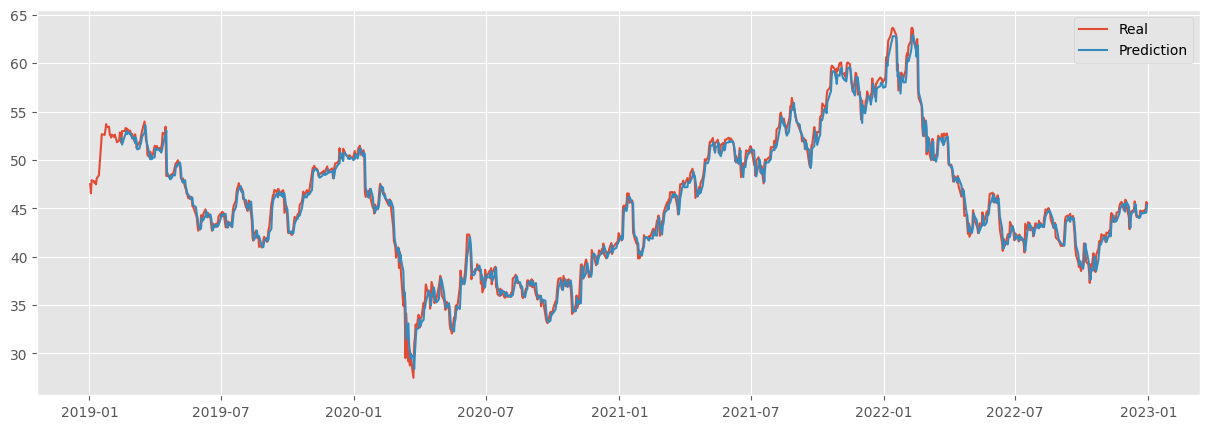

In [40]:
index_after_2019 = nya[nya.index > '2019-01-01'].index
# plt.plot(index_after_2019 , scaler.inverse_transform(data_test) , label='Real Close Price')
plt.plot(index_after_2019 ,close_test.values , label='Real')
plt.plot(index_after_2019[n_steps : ] , scaler.inverse_transform(prediction) , label='Prediction')
# plt.title('GDAXI Daily Close Price : Real vs. Prediction')
plt.legend()

In [41]:
def hamming_loss(y_test,prediction):
    return (y_test != prediction).sum().sum()/y_test.size



In [42]:
# data_test.size
# prediction.size

In [43]:

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate the evaluation metrics
mae = mean_absolute_error(data_test[30:],scaler.inverse_transform(prediction) )
rmse = np.sqrt(mean_squared_error(data_test[30:],scaler.inverse_transform(prediction) ))


In [44]:
mae

44.08490604396946

In [45]:
rmse

44.54455923867657